### plot schedules for job allocation problems considering job splitting

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 14})
color = ['#93B7BE', '#F9DCC4', '#CBDFBD', '#B8B8FF', '#DDA15E', '#C8D7F9', '#D6D2D2', '#7BE0AD', 'pink', '#FAE588', '#8AB17D', '#ED9390']

def schedulePlot(result, K, machineNum):
    # schedule data 
    schedule = pd.DataFrame({'job_id': result['job_id'], 'stage': result['stage'], 'machine_id': result['machine_id'],'completion time': result['completion time'], 'processing time': result['processing time'], 'due time': result['due time']})
    schedule['start time'] = schedule['completion time'] - schedule['processing time']
    jobSplitNum = schedule.shape[0]
    
    # plot
    fig, ax = plt.subplots(figsize=(K * 2, machineNum * 1.5))
    for i in range(jobSplitNum):
        jobSplitRec = [(schedule['start time'][i], schedule['processing time'][i])]
        s = "%s"%schedule['job_id'][i] + ", due time = " + "%s"%schedule['due time'][i]
        ax.broken_barh(jobSplitRec, ((schedule['machine_id'][i] - 0.25), 0.5), facecolors = color[i], label=s, edgecolor="black", zorder=2)
        ax.text(x=schedule['start time'][i] + schedule['processing time'][i] / 2, y = schedule['machine_id'][i], s="%s"%schedule['job_id'][i] + '-' + "%s"%schedule['stage'][i], ha='center', va='center',color='black')
    ax.set_xlim([0, K])
    ax.set_xticks(np.arange(0, K + 1, 1))
    ax.set_xlabel('Time')
    ax.set_ylim([0.5, machineNum + 0.5])
    ax.set_yticks(np.arange(1, machineNum + 1, 1))
    ax.set_ylabel('Machine')

    ax.set_title('Schedule Plot')
    ax.legend(loc = "upper left",bbox_to_anchor=(1, 1))
    ax.get_legend().set_title("job_id & due time")
    plt.grid()
    plt.show()

### Example

#### step 1 : declare input variables

In [3]:
# schedule data 
job_id = [1, 2, 3]
stage = [1, 1, 1]
machine_id = [3, 2, 1]
com_t = [1.5, 3, 1.2]
pro_t = [0.5, 0.6, 0.7]
due_t = [5, 2, 1]
K = 10
machineNum = 6

schedule = pd.DataFrame({'job_id': job_id, 'stage': stage, 'machine_id': machine_id,'completion time': com_t, 'processing time': pro_t, 'due time': due_t})
schedule['start time'] = schedule['completion time'] - schedule['processing time']
jobSplitNum = schedule.shape[0]

#### step 2 : call function

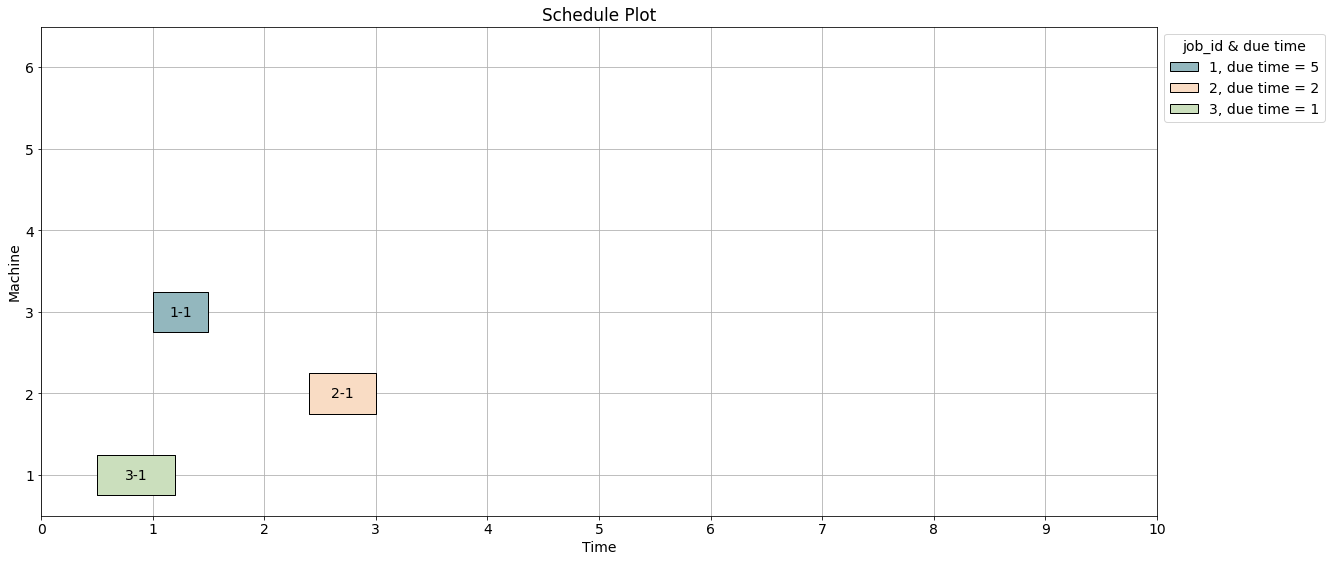

In [5]:
schedulePlot(schedule, K, machineNum)